## <font color = 'darkgreen'> Web Scraping and Model Development for the Stockholm housing market dataset

![City Image](https://res.klook.com/image/upload/cities/l60kj5nj2xedqjnf0tkf.jpg)

### <font color = 'darkgreen'>Business Problem 

<b>To analyze how reduction in interest rates influences property prices and migration patterns in Stockholm’s housing market

### <font color = 'darkgreen'>Objective

<b>To build a Polynomial Regression model to predict prices and investigate the relationship between  
    property types, interest rates and housing transitions.

### <font color = 'darkgreen'>Data Collection

<b> 1. Web Scraping the Housing Market Website: www.Booli.se    
    2. Downloading Monetary Policy report    : https://www.riksbank.se/
    

### <font color = 'darkgreen'>Data Set Description
    Sold Price    : Final price at which the house was sold in Swedish krona(SEK)(kr)
    Street Address: Specific location of the sold house
    Sold_date     : Date at which the property sale is legally finalized  
    Area Name     : Descriptive location area name
    Object Type   : Categorical variable which represents the different type of houses  
                    (e.g., Apartment, Rowhouse, Villa etc)
    Date          : Interest Rate published date by the Riskbank
    Interest Rate : Rate of interest on the specified date      

#### <font color = 'darkgreen'>1. Web Scraping

In [1]:
#Importing the necessary modules
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import time
from datetime import datetime

<b>Scraping rowhouse, semi-detached house URLs has been done seperately to avoid overwhelming the server  
and time-out error

In [2]:
# Defining base URLs for each object type
base_urls = {
    'Lägenhet': 'https://www.booli.se/sok/slutpriser?areaIds=1&objectType=Lägenhet&sort=soldDate&page={}',
    'Villa': 'https://www.booli.se/sok/slutpriser?areaIds=1&objectType=Villa&sort=soldDate&page={}'
    }

In [3]:
# Initialize a dictionary to store lists for each property type
results = {
    'Lägenhet': [],
    'Villa': []
    }

# Set maximum pages to scrape
max_pages = 300

# Loop through each property type
for object_type, base_url in [('Lägenhet', base_urls['Lägenhet']), 
                              ('Villa', base_urls['Villa'])]:
   

    print(f"Scraping {object_type}")

    # Pagination for scraping multiple desired pages
    for page_number in range(1, max_pages + 1):
        url = base_url.format(page_number)
        response = requests.get(url)
        
        if response.status_code == 200:
            print(f"Scraping page {page_number} for {object_type}")
            
            #Parsing the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')
            
            #Inspect the scriptid from HTML structure to retrieve data as there is a complex nested JSON structure
            script_tag = soup.find('script', id='__NEXT_DATA__')
            json_data = json.loads(script_tag.string)
            apollo_state = json_data['props']['pageProps']['__APOLLO_STATE__']

            # Check for sold properties
            data_found = False
            for key in apollo_state.keys():
                if key.startswith('SoldProperty:'):
                    data_found = True
                    property_data = apollo_state[key]

                    # Only collect data if the object type matches
                    if property_data.get('objectType') == object_type:
                        
                        sold_price = property_data.get('soldPrice', {}).get('formatted', 'N/A')
                        
                        street_address = property_data.get('streetAddress', 'N/A')
                        
                        # Handle living_area extraction safely based on faced challenges
                        living_area_data = property_data.get('livingArea', None)
                        
                        if living_area_data is not None:
                            living_area = living_area_data.get('formatted', 'N/A')
                        else:
                            living_area = 'N/A'  
                        
                        object_type = property_data.get('objectType', 'N/A')
                        
                        area_name = property_data.get('descriptiveAreaName', 'N/A')
                        
                        sold_date = property_data.get('soldDate', 'N/A')
                        
                        

                        # Append data to the appropriate list
                        results[object_type].append({
                            'Sold Price': sold_price,
                            'Street Address': street_address,
                            'Living Area': living_area,
                            'Object Type': object_type,
                            'Area Name': area_name,
                            'Sold Date': sold_date,
                        })

            # In case, if no data was found on the page, break the loop
            if not data_found:
                print(f"No more data found for {object_type} on page {page_number}.")
                break
        else:
            print(f"Failed to retrieve data from page {page_number} for {object_type}: {response.status_code}")
            break
        
        # Delay to avoid rate limiting or overwhelming the server (included based on faced challenges)
        time.sleep(2)

# Convert results to DataFrames and save as CSV for data consistency
for object_type, data in results.items():
    df = pd.DataFrame(data)
    df.to_csv(f'{object_type.lower()}.csv', index=False) 

Scraping Lägenhet
Scraping page 1 for Lägenhet
Scraping page 2 for Lägenhet
Scraping page 3 for Lägenhet
Scraping page 4 for Lägenhet
Scraping page 5 for Lägenhet
Scraping page 6 for Lägenhet
Scraping page 7 for Lägenhet
Scraping page 8 for Lägenhet
Scraping page 9 for Lägenhet
Scraping page 10 for Lägenhet
Scraping page 11 for Lägenhet
Scraping page 12 for Lägenhet
Scraping page 13 for Lägenhet
Scraping page 14 for Lägenhet
Scraping page 15 for Lägenhet
Scraping page 16 for Lägenhet
Scraping page 17 for Lägenhet
Scraping page 18 for Lägenhet
Scraping page 19 for Lägenhet
Scraping page 20 for Lägenhet
Scraping page 21 for Lägenhet
Scraping page 22 for Lägenhet
Scraping page 23 for Lägenhet
Scraping page 24 for Lägenhet
Scraping page 25 for Lägenhet
Scraping page 26 for Lägenhet
Scraping page 27 for Lägenhet
Scraping page 28 for Lägenhet
Scraping page 29 for Lägenhet
Scraping page 30 for Lägenhet
Scraping page 31 for Lägenhet
Scraping page 32 for Lägenhet
Scraping page 33 for Lägenhet
S

Scraping page 269 for Lägenhet
Scraping page 270 for Lägenhet
Scraping page 271 for Lägenhet
Scraping page 272 for Lägenhet
Scraping page 273 for Lägenhet
Scraping page 274 for Lägenhet
Scraping page 275 for Lägenhet
Scraping page 276 for Lägenhet
Scraping page 277 for Lägenhet
Scraping page 278 for Lägenhet
Scraping page 279 for Lägenhet
Scraping page 280 for Lägenhet
Scraping page 281 for Lägenhet
Scraping page 282 for Lägenhet
Scraping page 283 for Lägenhet
Scraping page 284 for Lägenhet
Scraping page 285 for Lägenhet
Scraping page 286 for Lägenhet
Scraping page 287 for Lägenhet
Scraping page 288 for Lägenhet
Scraping page 289 for Lägenhet
Scraping page 290 for Lägenhet
Scraping page 291 for Lägenhet
Scraping page 292 for Lägenhet
Scraping page 293 for Lägenhet
Scraping page 294 for Lägenhet
Scraping page 295 for Lägenhet
Scraping page 296 for Lägenhet
Scraping page 297 for Lägenhet
Scraping page 298 for Lägenhet
Scraping page 299 for Lägenhet
Scraping page 300 for Lägenhet
Scraping

Scraping page 262 for Villa
Scraping page 263 for Villa
Scraping page 264 for Villa
Scraping page 265 for Villa
Scraping page 266 for Villa
Scraping page 267 for Villa
Scraping page 268 for Villa
Scraping page 269 for Villa
Scraping page 270 for Villa
Scraping page 271 for Villa
Scraping page 272 for Villa
Scraping page 273 for Villa
Scraping page 274 for Villa
Scraping page 275 for Villa
Scraping page 276 for Villa
Scraping page 277 for Villa
Scraping page 278 for Villa
Scraping page 279 for Villa
Scraping page 280 for Villa
Scraping page 281 for Villa
Scraping page 282 for Villa
Scraping page 283 for Villa
Scraping page 284 for Villa
Scraping page 285 for Villa
Scraping page 286 for Villa
Scraping page 287 for Villa
Scraping page 288 for Villa
Scraping page 289 for Villa
Scraping page 290 for Villa
Scraping page 291 for Villa
Scraping page 292 for Villa
Scraping page 293 for Villa
Scraping page 294 for Villa
Scraping page 295 for Villa
Scraping page 296 for Villa
Scraping page 297 fo

In [4]:
# Read the individual CSV files
df_rowhouse = pd.read_csv('kedjehus_parhus_radhus.csv')
df_apartment = pd.read_csv('lägenhet.csv')
df_villa = pd.read_csv('villa.csv')

#### <font color = 'darkgreen'>2. Monetary Policy rapport data

In [5]:
interest_rate_df = pd.read_excel('styrrantan-effektiv.xlsx')

In [6]:
interest_rate_df

,Date,Interest Rate,Year,Month
0,2006-01-26,1.75,2006,1
1,2006-03-02,2.00,2006,3
2,2006-05-03,2.00,2006,5
3,2006-06-22,2.25,2006,6
4,2006-09-07,2.50,2006,9
...,...,...,...,...
110,2024-04-03,4.00,2024,4
111,2024-05-15,3.75,2024,5
112,2024-07-03,3.75,2024,7
113,2024-08-21,3.50,2024,8


### <font color = 'darkgreen'>Data Cleaning and Data Preprocessing

In [7]:
print(df_rowhouse.head())
print(df_apartment.head())
print(df_villa.head())

     Sold Price      Street Address Living Area Object Type  \
0  4 420 000 kr   Gräsmarksgränd 33       92 m²      Radhus   
1  3 799 000 kr   Kattfotsbacken 30      104 m²      Radhus   
2  1 350 000 kr     Imatragatan 324      39½ m²      Radhus   
3  4 800 000 kr  Torplyckegränd 206      113 m²      Parhus   
4  9 450 000 kr        Letstigen 12      102 m²      Radhus   

                  Area Name   Sold Date  
0                    Farsta  2024-10-24  
1  Hässelby Norra Villastad  2024-10-23  
2      Akalla Trädgårdsstad  2024-10-22  
3                    Vinsta  2024-10-21  
4               Bagarmossen  2024-10-21  
      Sold Price       Street Address Living Area Object Type  \
0   6 400 000 kr     Vinodlargatan 11      84½ m²    Lägenhet   
1   3 300 000 kr      Dalbobranten 31       73 m²    Lägenhet   
2   8 100 000 kr  Ludvigsbergsgatan 5       81 m²    Lägenhet   
3   3 750 000 kr  Tellusborgsvägen 66       45 m²    Lägenhet   
4  13 350 000 kr       Bondegatan 74A       

In [8]:
df_rowhouse.isnull().any()

Sold Price        False
Street Address    False
Living Area        True
Object Type       False
Area Name         False
Sold Date         False
dtype: bool

In [9]:
df_apartment.isnull().any()

Sold Price        False
Street Address    False
Living Area        True
Object Type       False
Area Name         False
Sold Date         False
dtype: bool

In [10]:
df_villa.isnull().any()

Sold Price        False
Street Address    False
Living Area        True
Object Type       False
Area Name         False
Sold Date         False
dtype: bool

In [11]:
#Merging it into a single dataframe
df_merged = pd.concat([df_rowhouse, df_apartment,df_villa],ignore_index = True)

In [12]:
# Converting sold_date into datetime 
df_merged['Sold Date'] = pd.to_datetime(df_merged['Sold Date'])

# Initializing start_date and end_date 
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2024-10-25')

In [13]:
# Extracting 'year' and 'month' as a seperate column from the merged dataset
df_merged['Year'] = pd.DatetimeIndex(df_merged['Sold Date']).year
df_merged['Month'] = pd.DatetimeIndex(df_merged['Sold Date']).month

In [14]:
# Filtering the dataset based on specific dates
real_estate_df = df_merged[(df_merged['Sold Date'] >= start_date) &
                           (df_merged['Sold Date'] <= end_date)]

In [15]:
real_estate_df.head()

,Sold Price,Street Address,Living Area,Object Type,Area Name,Sold Date,Year,Month
0,4 420 000 kr,Gräsmarksgränd 33,92 m²,Radhus,Farsta,2024-10-24,2024,10
1,3 799 000 kr,Kattfotsbacken 30,104 m²,Radhus,Hässelby Norra Villastad,2024-10-23,2024,10
2,1 350 000 kr,Imatragatan 324,39½ m²,Radhus,Akalla Trädgårdsstad,2024-10-22,2024,10
3,4 800 000 kr,Torplyckegränd 206,113 m²,Parhus,Vinsta,2024-10-21,2024,10
4,9 450 000 kr,Letstigen 12,102 m²,Radhus,Bagarmossen,2024-10-21,2024,10


In [16]:
# Merging interest rate column from the df to the existing df based on year and month 
real_estate_df = real_estate_df.merge(interest_rate_df[['Year','Month','Interest Rate']], on = ['Year','Month'], how = 'left')

In [17]:
real_estate_df.columns

Index(['Sold Price', 'Street Address', 'Living Area', 'Object Type',
       'Area Name', 'Sold Date', 'Year', 'Month', 'Interest Rate'],
      dtype='object')

In [18]:
real_estate_df.shape

(30524, 9)

In [19]:
real_estate_df['Interest Rate'].isnull().sum()

15057

In [20]:
real_estate_df.head()

,Sold Price,Street Address,Living Area,Object Type,Area Name,Sold Date,Year,Month,Interest Rate
0,4 420 000 kr,Gräsmarksgränd 33,92 m²,Radhus,Farsta,2024-10-24,2024,10,3.25
1,3 799 000 kr,Kattfotsbacken 30,104 m²,Radhus,Hässelby Norra Villastad,2024-10-23,2024,10,3.25
2,1 350 000 kr,Imatragatan 324,39½ m²,Radhus,Akalla Trädgårdsstad,2024-10-22,2024,10,3.25
3,4 800 000 kr,Torplyckegränd 206,113 m²,Parhus,Vinsta,2024-10-21,2024,10,3.25
4,9 450 000 kr,Letstigen 12,102 m²,Radhus,Bagarmossen,2024-10-21,2024,10,3.25


In [21]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30524 entries, 0 to 30523
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sold Price      30524 non-null  object        
 1   Street Address  30524 non-null  object        
 2   Living Area     30439 non-null  object        
 3   Object Type     30524 non-null  object        
 4   Area Name       30524 non-null  object        
 5   Sold Date       30524 non-null  datetime64[ns]
 6   Year            30524 non-null  int64         
 7   Month           30524 non-null  int64         
 8   Interest Rate   15467 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 2.3+ MB


In [22]:
real_estate_df.describe()

,Year,Month,Interest Rate
count,30524.000000,30524.000000,15467.000000
mean,2020.728509,6.959802,1.631412
std,3.327671,2.951251,1.851864
min,2013.000000,1.000000,-0.500000
25%,2018.000000,5.000000,-0.250000
50%,2021.000000,7.000000,1.000000
75%,2024.000000,9.000000,3.500000
max,2024.000000,12.000000,4.000000


In [23]:
real_estate_df['Object Type'].value_counts()

Villa       10810
Lägenhet     9582
Radhus       7735
Kedjehus     1637
Parhus        759
Gård            1
Name: Object Type, dtype: int64

#### <b>Handling missing values

In [24]:
real_estate_df['Interest Rate'] = real_estate_df['Interest Rate'].fillna(method = 'ffill')

In [25]:
real_estate_df['Interest Rate'].isnull().any()

False

In [26]:
# Remove non-numeric characters like comma,sq.m from the column 'Living Area'
real_estate_df['Living Area'] = real_estate_df['Living Area'].str.replace(r'[^\d]','',regex = True)

In [27]:
# convert it into numeric therby handling NaN values
real_estate_df['Living Area'] = pd.to_numeric(real_estate_df['Living Area'], errors = 'coerce')

In [28]:
# grouping based on object type before filling missing values for the column living area
real_estate_df['Living Area'] = real_estate_df.groupby('Object Type')['Living Area'].transform(lambda x: x.fillna(x.median()))

#### <b> Removing Outlier

In [29]:
real_estate_df = real_estate_df[real_estate_df['Object Type'] != 'Gård']

#### <b>Removing inconsistent dataformat

In [30]:
# Remove non-numeric characters like comma, kr from 'Sold Price' and convert it to integer
real_estate_df['Sold Price'] = real_estate_df['Sold Price'].str.replace(r'[^\d]','',regex = True).astype(int)
# Verify the result
print(real_estate_df['Sold Price'].head())

0    4420000
1    3799000
2    1350000
3    4800000
4    9450000
Name: Sold Price, dtype: int32


### <font color = 'darkgreen'>Exploratory Data Analysis

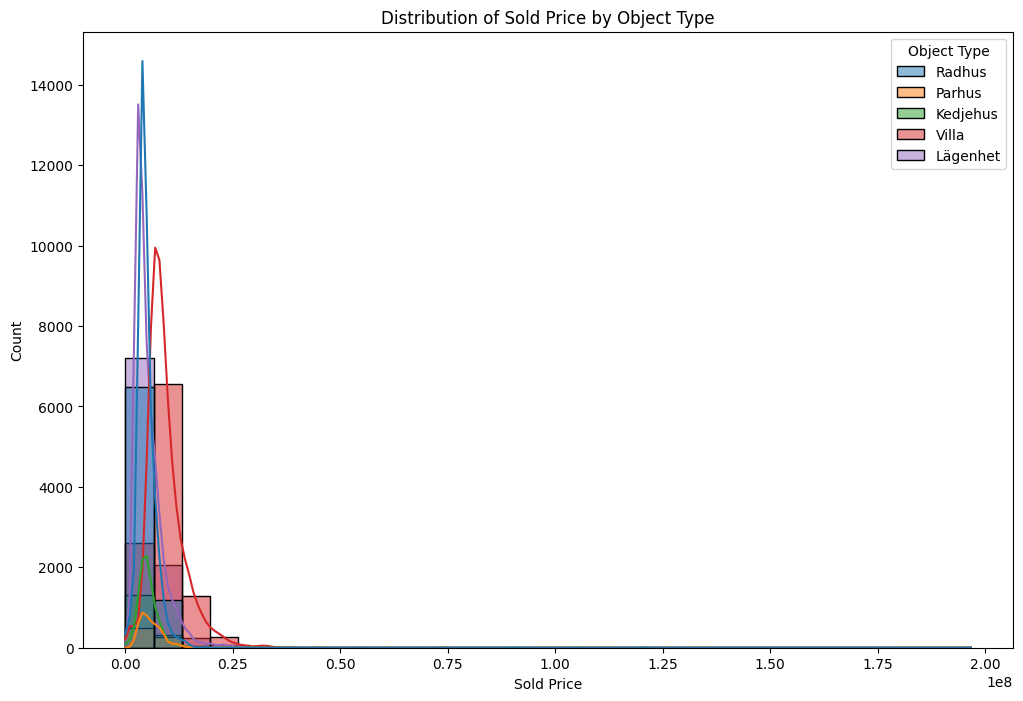

In [31]:
#Distribution of Sold Price by Object Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.histplot(data=real_estate_df, x='Sold Price', hue='Object Type', bins=30, kde=True)
plt.title('Distribution of Sold Price by Object Type')
plt.show()

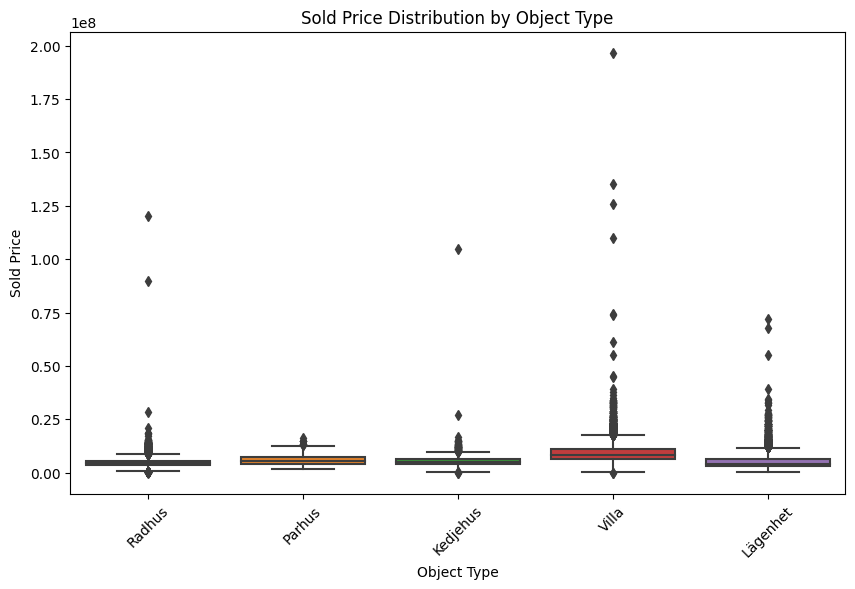

In [32]:
# to understand IQR, min and max value of sold price for each object type
plt.figure(figsize=(10,6))
sns.boxplot(data=real_estate_df, x='Object Type', y='Sold Price')
plt.title('Sold Price Distribution by Object Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\nklmy\AppData\Local\Temp\ipykernel_18036\1080443470.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(real_estate_df.corr(), annot = True, cmap = 'coolwarm')


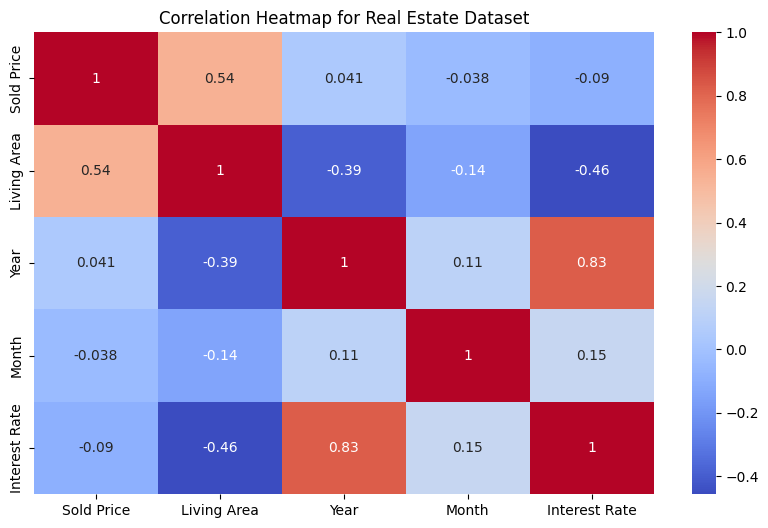

In [33]:
# to understand the relationship between numerical variables
plt.figure(figsize = (10,6))
sns.heatmap(real_estate_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for Real Estate Dataset')
plt.show()

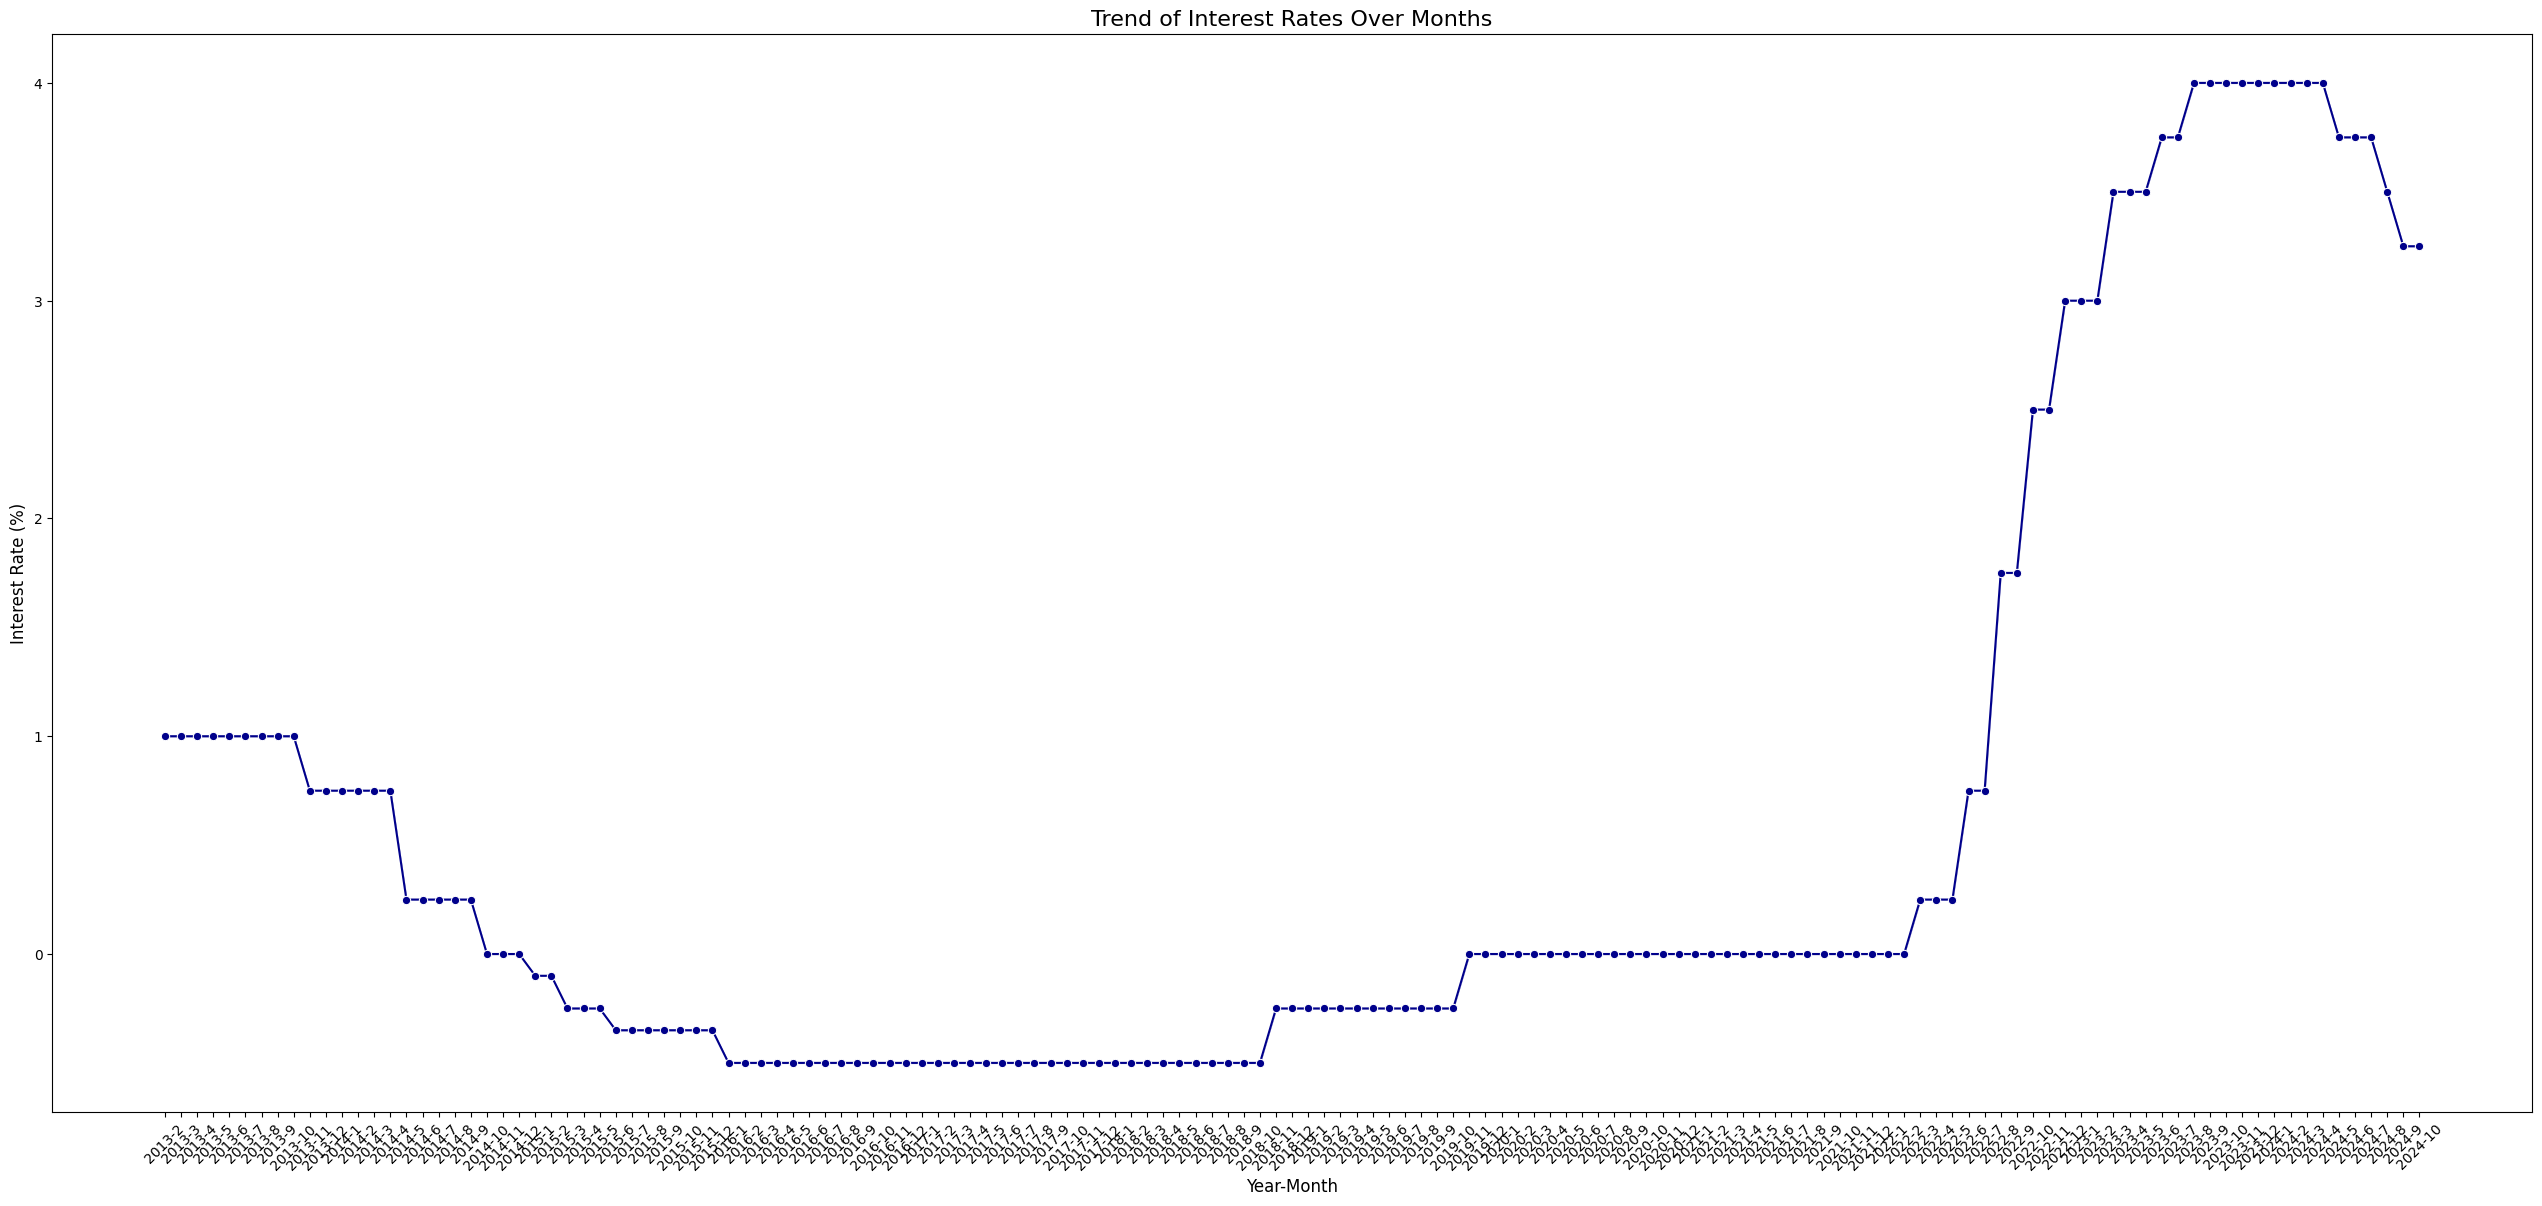

In [34]:
# Create a 'Year-Month' column to represent it in the plot 
real_estate_df['Year-Month'] = real_estate_df['Year'].astype(str) + '-' + real_estate_df['Month'].astype(str)

# Sort by 'Year-Month' to ensure proper order
real_estate_df = real_estate_df.sort_values(by=['Year', 'Month'])

# Plotting the interest rate trend over months
plt.figure(figsize=(32,14))
sns.lineplot(data=real_estate_df, x='Year-Month', y='Interest Rate', color = 'darkblue',marker='o')

# Customize the plot
plt.title('Trend of Interest Rates Over Months', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

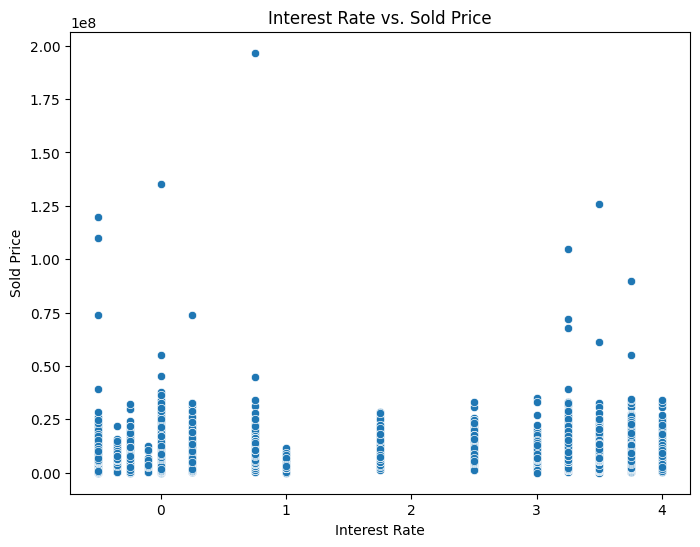

In [35]:
# Scatter plot: Interest Rate vs. Sold Price
plt.figure(figsize=(8,6))
sns.scatterplot(x=real_estate_df['Interest Rate'], y=real_estate_df['Sold Price'])
plt.title('Interest Rate vs. Sold Price')
plt.show()

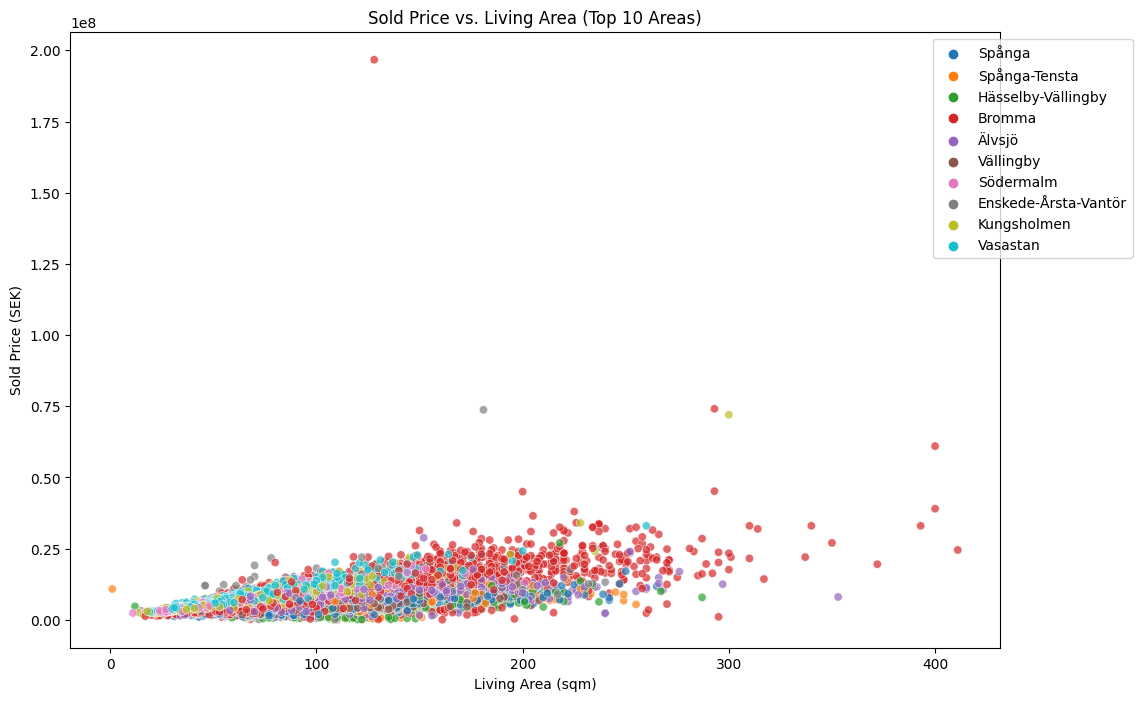

In [36]:
# Extracting top 10 areas by count (regardless of the property type,total count matters)
top_areas = real_estate_df['Area Name'].value_counts().nlargest(10).index
filtered_df = real_estate_df[real_estate_df['Area Name'].isin(top_areas)]

# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(data=filtered_df, x='Living Area', y='Sold Price', hue='Area Name', palette='tab10', alpha=0.7)
plt.title('Sold Price vs. Living Area (Top 10 Areas)')
plt.ylabel('Sold Price (SEK)')
plt.xlabel('Living Area (sqm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


In [37]:
# Calculate average Living Area and Sold Price by Area and Object Type
area_stats = real_estate_df.groupby(['Area Name', 'Object Type']).agg(
    avg_living_area=('Living Area', 'mean'),
    avg_sold_price=('Sold Price', 'mean')
).reset_index()

# Get top 10 areas by average Living Area
top_areas_living_area = area_stats.nlargest(10, 'avg_living_area')['Area Name']
# Get top 10 areas by average Sold Price
top_areas_sold_price = area_stats.nlargest(10, 'avg_sold_price')['Area Name']


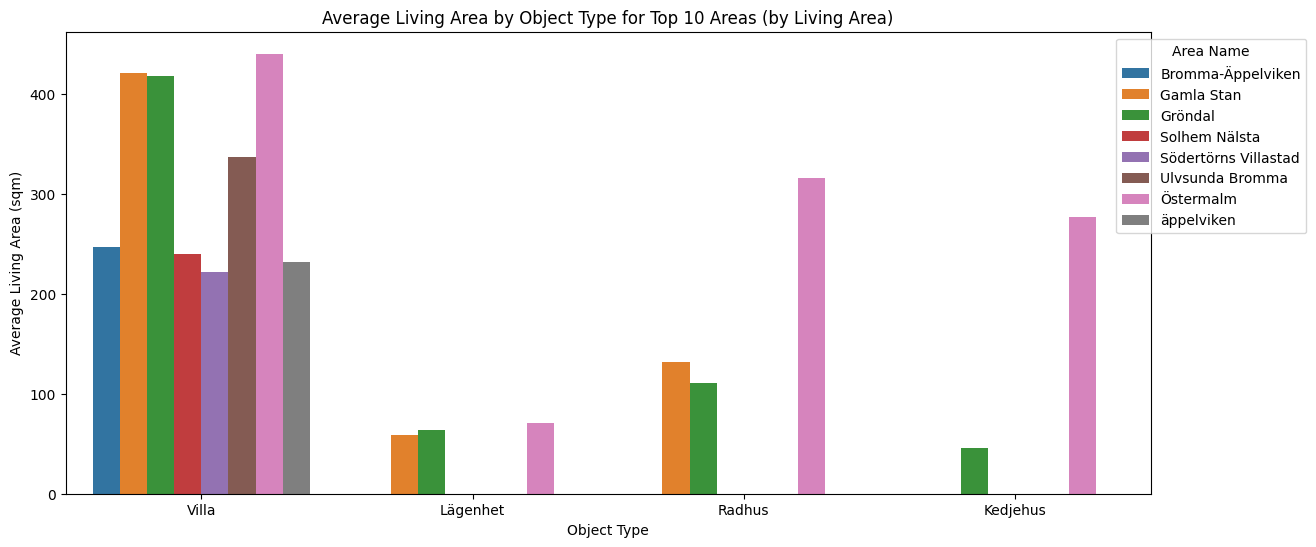

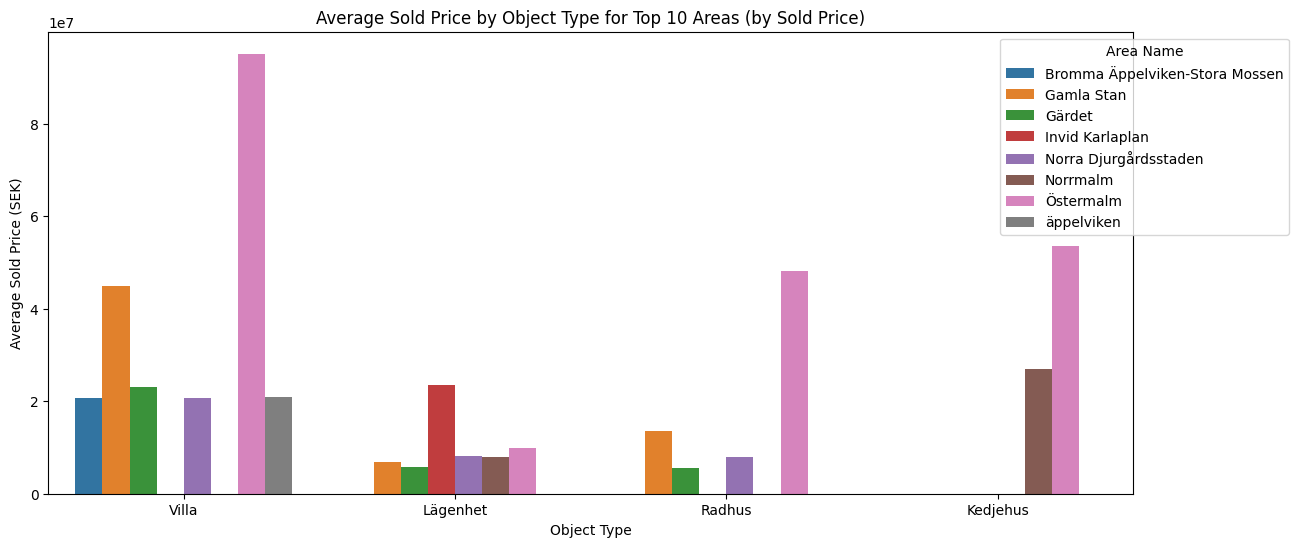

In [38]:
# Plot Average Living Area and Sold Price Across Object Types for Top 10 Areas
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 10 areas by Living Area and Sold Price
filtered_living_area = area_stats[area_stats['Area Name'].isin(top_areas_living_area)]
filtered_sold_price = area_stats[area_stats['Area Name'].isin(top_areas_sold_price)]

# Plot for Average Living Area
plt.figure(figsize=(14, 6))
sns.barplot(
    data=filtered_living_area,
    x='Object Type', 
    y='avg_living_area', 
    hue='Area Name', 
    palette='tab10'
)
plt.title('Average Living Area by Object Type for Top 10 Areas (by Living Area)')
plt.ylabel('Average Living Area (sqm)')
plt.xlabel('Object Type')
plt.legend(title='Area Name', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# Plot for Average Sold Price
plt.figure(figsize=(14, 6))
sns.barplot(
    data=filtered_sold_price,
    x='Object Type', 
    y='avg_sold_price', 
    hue='Area Name', 
    palette='tab10'
)
plt.title('Average Sold Price by Object Type for Top 10 Areas (by Sold Price)')
plt.ylabel('Average Sold Price (SEK)')
plt.xlabel('Object Type')
plt.legend(title='Area Name', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


### <font color = 'darkgreen'>Encoding Categorical Variable

In [39]:
real_estate_df = pd.get_dummies(real_estate_df, columns = ['Object Type'], drop_first=True)

In [40]:
real_estate_df

,Sold Price,Street Address,Living Area,Area Name,Sold Date,Year,Month,Interest Rate,Year-Month,Object Type_Lägenhet,Object Type_Parhus,Object Type_Radhus,Object Type_Villa
10447,2000000,Torpstugegränd 32,90.0,Spånga,2013-02-28,2013,2,1.00,2013-2,0,0,0,0
10448,4100000,Lisebergsvägen 109A,136.0,Älvsjö Liseberg,2013-02-28,2013,2,1.00,2013-2,0,0,1,0
10449,3250000,Ekshäradsgatan 228,87.0,Farsta,2013-02-28,2013,2,1.00,2013-2,0,0,1,0
10450,2800000,Gillsätragränd 88,126.0,Sätra,2013-02-28,2013,2,1.00,2013-2,0,0,1,0
10451,4460000,Älvkvarnsvägen 76,150.0,Spånga-Tensta,2013-02-28,2013,2,1.00,2013-2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,8000000,Doktor Abrahams väg 46,85.0,Bromma Kyrka,2024-10-01,2024,10,3.25,2024-10,0,0,0,1
20212,9200000,Bollstavägen 2,101.0,Stureby,2024-10-01,2024,10,3.25,2024-10,0,0,0,1
20213,7700000,Granskogsvägen 31,184.0,Hässelby Norra Villastad,2024-10-01,2024,10,3.25,2024-10,0,0,0,1
20214,9925000,Mälarhöjdsvägen 69,95.0,Hägersten-Liljeholmen,2024-10-01,2024,10,3.25,2024-10,0,0,0,1


### <font color = 'darkgreen'>Feature Scaling

In [41]:
import numpy as np

In [42]:
real_estate_df['Sold Price Log'] = np.log(real_estate_df['Sold Price'])

### <font color = 'darkgreen'>Model Development

<b>1. Train-Test data split

In [43]:
# importing the necessary library
from sklearn.model_selection import train_test_split

X = real_estate_df.drop(columns = ['Sold Price','Street Address','Area Name','Sold Date','Year-Month'])
y = real_estate_df['Sold Price']

# spliting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

<b>2. Training the Model 

In [45]:
# training the multiple linear regression model on the training data set'
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pol_reg = PolynomialFeatures(degree=3)

# Transforming the features
X_pol = pol_reg.fit_transform(X_train)

# Fitting the Linear Regression model 
lin_reg_of_poly = LinearRegression()
lin_reg_of_poly.fit(X_pol, y_train)  

# Transforming the test data
X_test_pol = pol_reg.transform(X_test)  

<b>3. Model Prediction

In [46]:
# Making predictions on the transformed test data
y_pred = lin_reg_of_poly.predict(X_test_pol)

<b>4. Model Evaluation

In [47]:
# Mean Squared Error and R-squared for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse:.2f} SEK')

print(f'R-squared: {r2}')


Root Mean Squared Error: 501764.27 SEK
R-squared: 0.9861467444091133


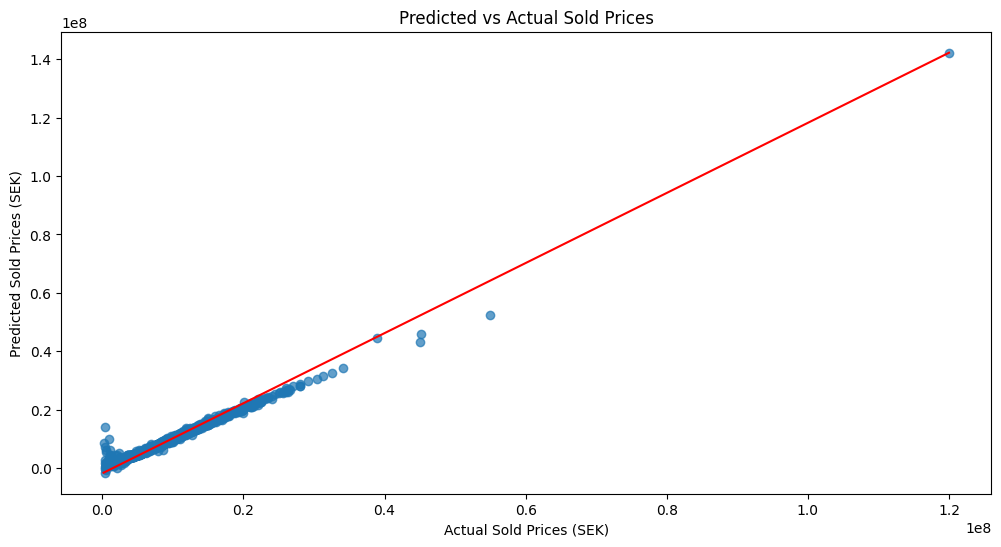

In [48]:
# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red')
plt.title('Predicted vs Actual Sold Prices')
plt.xlabel('Actual Sold Prices (SEK)')
plt.ylabel('Predicted Sold Prices (SEK)')
plt.show()


<b>5. Saving the model 

In [49]:
# Save the model to a file
import joblib
joblib.dump(lin_reg_of_poly, 'stockholm_property_price_model.pkl')

['stockholm_property_price_model.pkl']